In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import seaborn as sns
import pandas as pd

# Hyper Parameters
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST Dataset 
train_dataset = dsets.MNIST(root ='./data',
							train = True,
							transform = transforms.ToTensor(),
							download = True)

test_dataset = dsets.MNIST(root ='./data',
						train = False,
						transform = transforms.ToTensor())

# Dataset Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
										batch_size = batch_size,
										shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
										batch_size = batch_size,
										shuffle = False)

In [ ]:
# Model
class LogisticRegression(nn.Module):
	def __init__(self, input_size, num_classes):
		super(LogisticRegression, self).__init__()
		self.linear = nn.Linear(input_size, num_classes)

	def forward(self, x):
		out = self.linear(x)
		return out


model = LogisticRegression(input_size, num_classes)

# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.

criterion = nn.CrossEntropyLoss()

# with SGD
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=0.003)
# with ADAM
#optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate,weight_decay=0.003)
# with NESTEROV
#optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=0.003,nesterov=True)

# Training the Model
for epoch in range(num_epochs):
	
	for i, (images, labels) in enumerate(train_loader):
		images = Variable(images.view(-1, 28 * 28))
		labels = Variable(labels)

		# Forward + Backward + Optimize
		optimizer.zero_grad()
		outputs = model(images)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		#accuracy = 100 * correct.item() / labels.size(0)

		if (i + 1) % 100 == 0: 
			print('Epoch: [% d/% d],  Loss: %.4f' % (epoch + 1, num_epochs, loss.item() ))
		
# Test the Model
correct = 0
total = 0

mpred=[]
mlabel=[]

for images, labels in test_loader:
	images = Variable(images.view(-1, 28 * 28))
	outputs = model(images)
	_, predicted = torch.max(outputs.data, 1)
	mlabel.append(labels.numpy())
	mpred.append(predicted.numpy())
	total += labels.size(0)
	correct += (predicted == labels).sum()

print('Accuracy of the model on 10000 test datas : %.2f %%' % (100 * correct / total))


-------------------------------------------------------
----------------Confusion Matrix-----------------------
-------------------------------------------------------


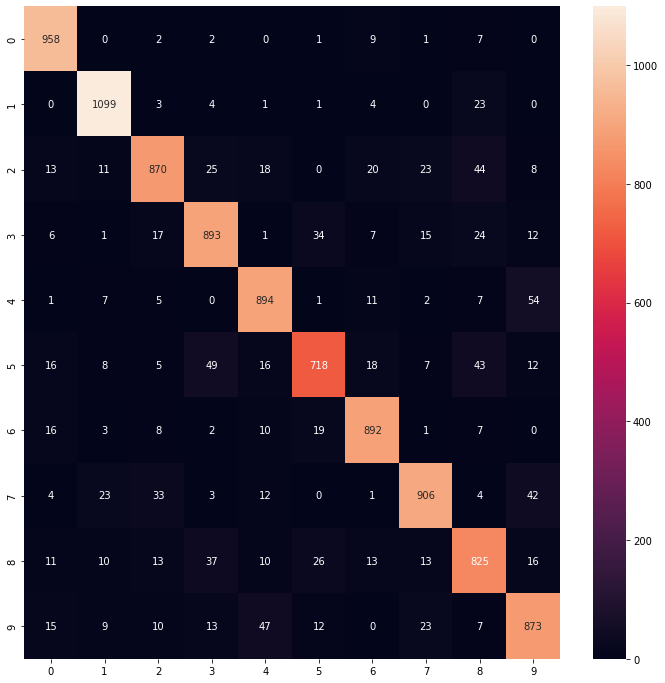

In [ ]:
print("-------------------------------------------------------")
print("----------------Confusion Matrix-----------------------")
print("-------------------------------------------------------")

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

array = confusion_matrix(np.asarray(mlabel).flatten(),np.asarray(mpred).flatten())
df_cm = pd.DataFrame(array, index = [i for i in "0123456789"], columns = [i for i in "0123456789"])
plt.figure(figsize = (12, 12))
sns.heatmap(df_cm, annot = True,fmt='g')